In [ ]:
!pip install seaborn

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = sns.load_dataset("titanic")

In [ ]:
df.shape

(891, 15)

In [ ]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.tail(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df["survived"].value_counts()

,count
survived,
0,549
1,342


In [ ]:
df["who"].value_counts()

,count
who,
man,537
woman,271
child,83


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
df["age"] = df["age"].fillna(df["age"].median())

In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
df["embark_town"] = df["embark_town"].fillna(df["embark_town"].mode()[0])

In [ ]:
df = df.drop(columns =["deck"])

In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
df.groupby('sex')['survived'].mean()

,survived
sex,
female,0.742038
male,0.188908


<Axes: >

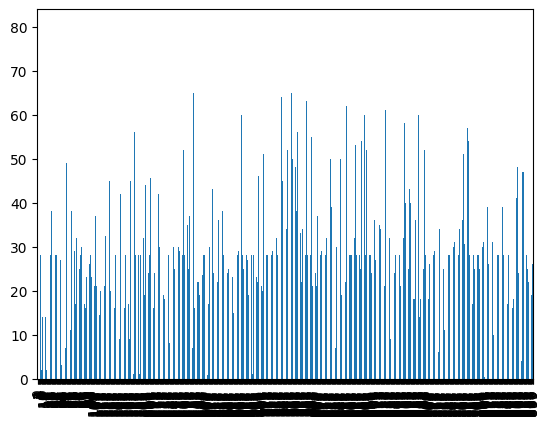

In [ ]:
df["age"].plot(kind="bar")

![image.png](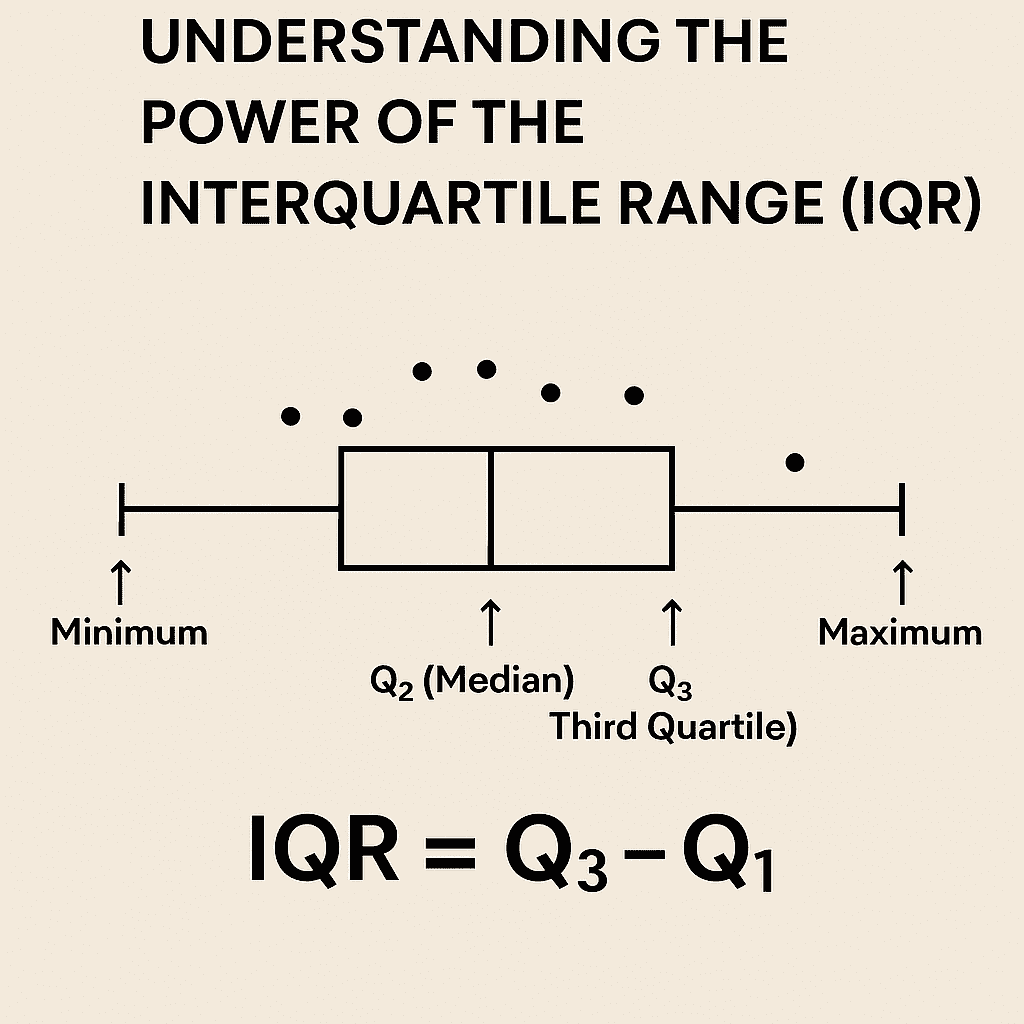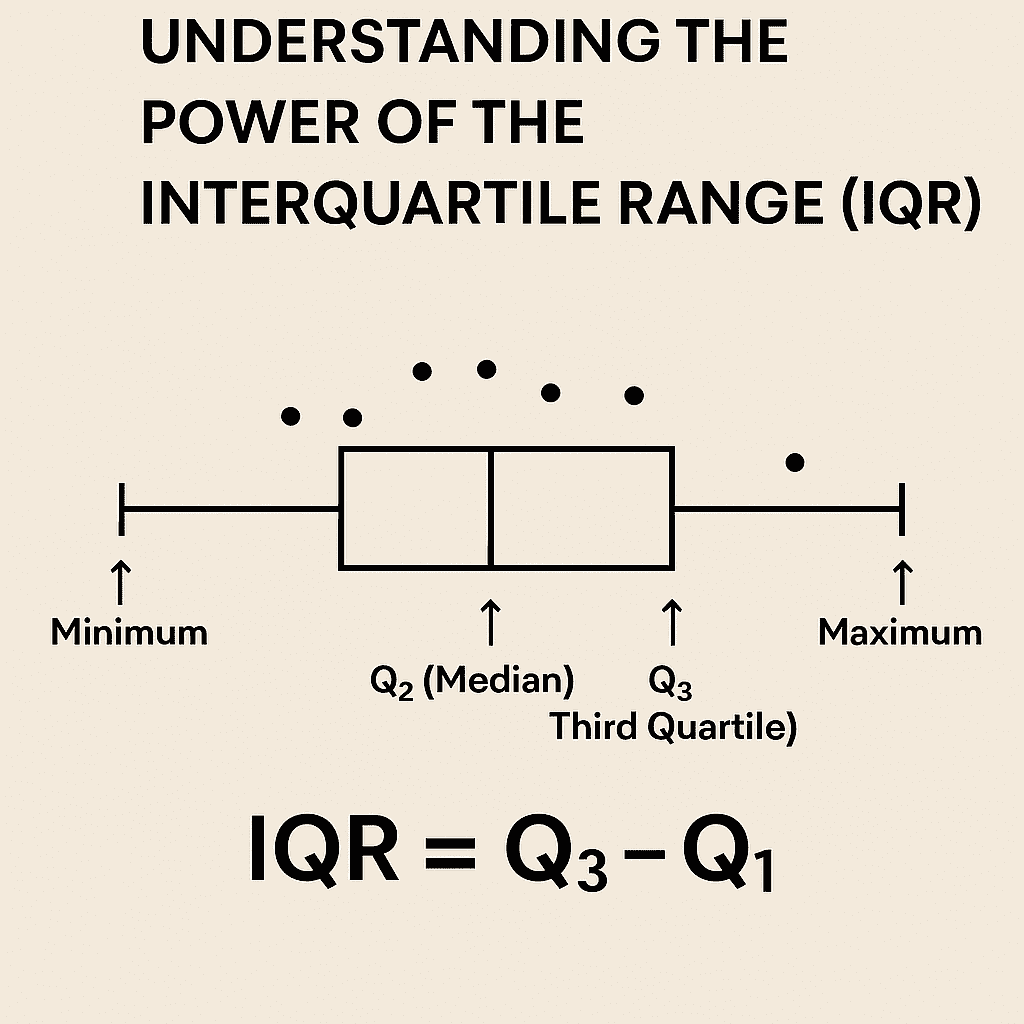)

In [ ]:
Q1 = df["age"].quantile(0.25)

In [ ]:
Q3 = df["age"].quantile(0.75)

In [ ]:
IQR = Q3-Q1

In [ ]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [ ]:
lower

np.float64(2.5)

In [ ]:
upper

np.float64(54.5)

In [ ]:
outlier = df[df["age"] < int(lower) | (df['age'] > int(upper))]

In [ ]:
outlier

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,Southampton,yes,False
305,1,1,male,0.92,1,2,151.5500,S,First,child,False,Southampton,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,Cherbourg,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,Southampton,yes,False
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,Cherbourg,yes,False
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,Southampton,yes,False


<Axes: xlabel='class', ylabel='age'>

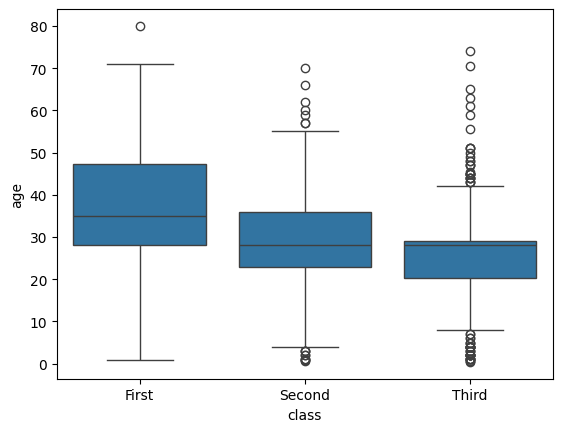

In [ ]:
sns.boxplot(x="class", y="age", data=df)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


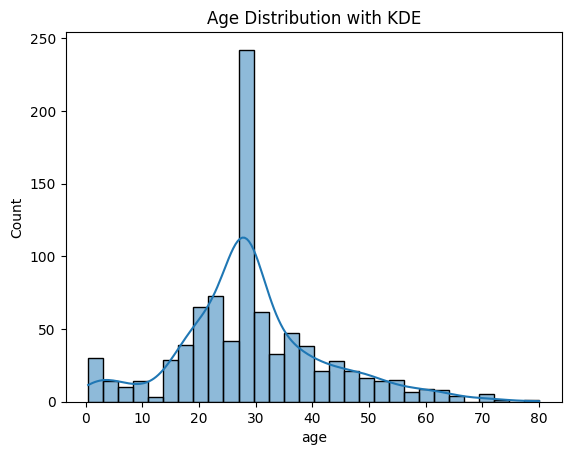

In [ ]:
sns.histplot(df["age"],bins=30, kde=True)
plt.title("Age Distribution with KDE")
plt.show()

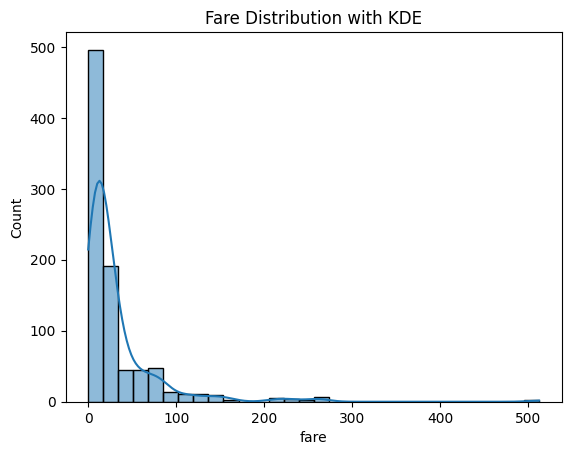

In [ ]:
sns.histplot(df["fare"],bins=30, kde=True)
plt.title("Fare Distribution with KDE")
plt.show()

In [ ]:
import numpy as np

df['log_fare'] = np.log1p(df["fare"])

<Axes: xlabel='log_fare', ylabel='Count'>

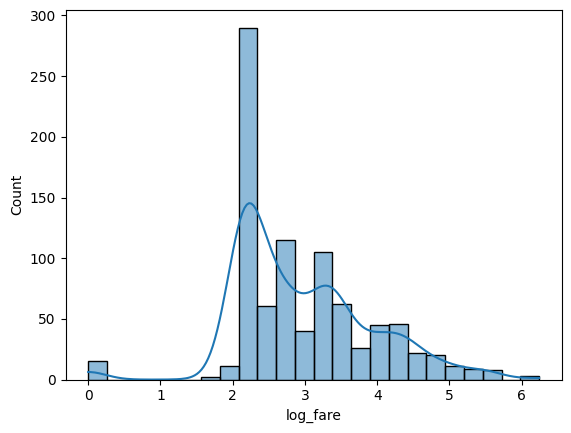

In [ ]:
sns.histplot(df['log_fare'],kde=True)

In [ ]:
#KPI Overall Surivied Rate

survival_rate = df["survived"].mean()*100

In [ ]:
survival_rate

np.float64(38.38383838383838)

In [ ]:
gender_survivel = df.groupby('sex')['survived'].mean()*100

In [ ]:

gender_survivel

,survived
sex,
female,74.203822
male,18.890815


In [ ]:
class_survivel = df.groupby('pclass')['survived'].mean()*100

In [ ]:
class_survivel

,survived
pclass,
1,62.962963
2,47.282609
3,24.236253


In [ ]:
avg_age = df.groupby('survived')['age'].mean()*100

In [ ]:
avg_age

,age
survived,
0,3002.823315
1,2829.143275


In [ ]:
df["is_child"] = (df['age'] < 16).astype(int)


In [ ]:
child_survival = df.groupby('is_child')["survived"].mean() * 100

In [ ]:
child_survival

,survived
is_child,
0,36.262376
1,59.036145
